In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import os

In [5]:
SOURCE_IMAGES_DIR_PATH = "/home/ubuntu/data/foster/ch03_06/source_images/"
RECONST_IMAGES_DIR_PATH = "/home/ubuntu/data/foster/ch03_06/reconst_images/"

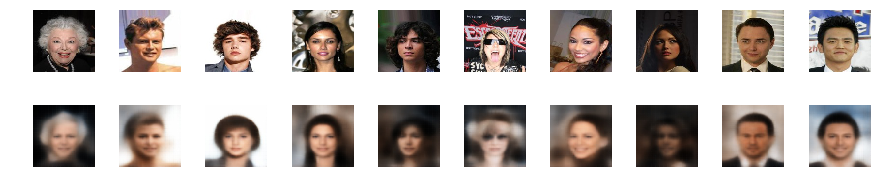

In [6]:
N = 10
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(N):
    path = os.path.join(SOURCE_IMAGES_DIR_PATH, "{:>02d}.jpg".format(i))
    img = Image.open(path)
    sub = fig.add_subplot(2, N, i+1)
    sub.axis('off')        
    sub.imshow(img)
    
for i in range(N):
    path = os.path.join(RECONST_IMAGES_DIR_PATH, "{:>02d}.jpg".format(i))
    img = Image.open(path)
    sub = fig.add_subplot(2, N, i+N+1)
    sub.axis('off')
    sub.imshow(img)


In [7]:
Z_POINTS_DIR_PATH = "/home/ubuntu/data/foster/ch03_06/z_points/"

In [8]:
import glob
import struct
import numpy as np

In [9]:
z_points_paths = glob.glob(os.path.join(Z_POINTS_DIR_PATH, "*.bin"))

In [10]:
def read_binary(path, dst):
    data = open(path, "rb").read()
    float_size = 4
    c = len(data) // float_size
    for i in range(c):
        j = 4 * i
        dst[i] = struct.unpack("<f", data[j: j + float_size])[0]

In [11]:
z_test =  np.empty((200, 200))
for i, path in enumerate(z_points_paths):
    read_binary(path, z_test[i])

In [12]:
print(z_test.shape)

(200, 200)


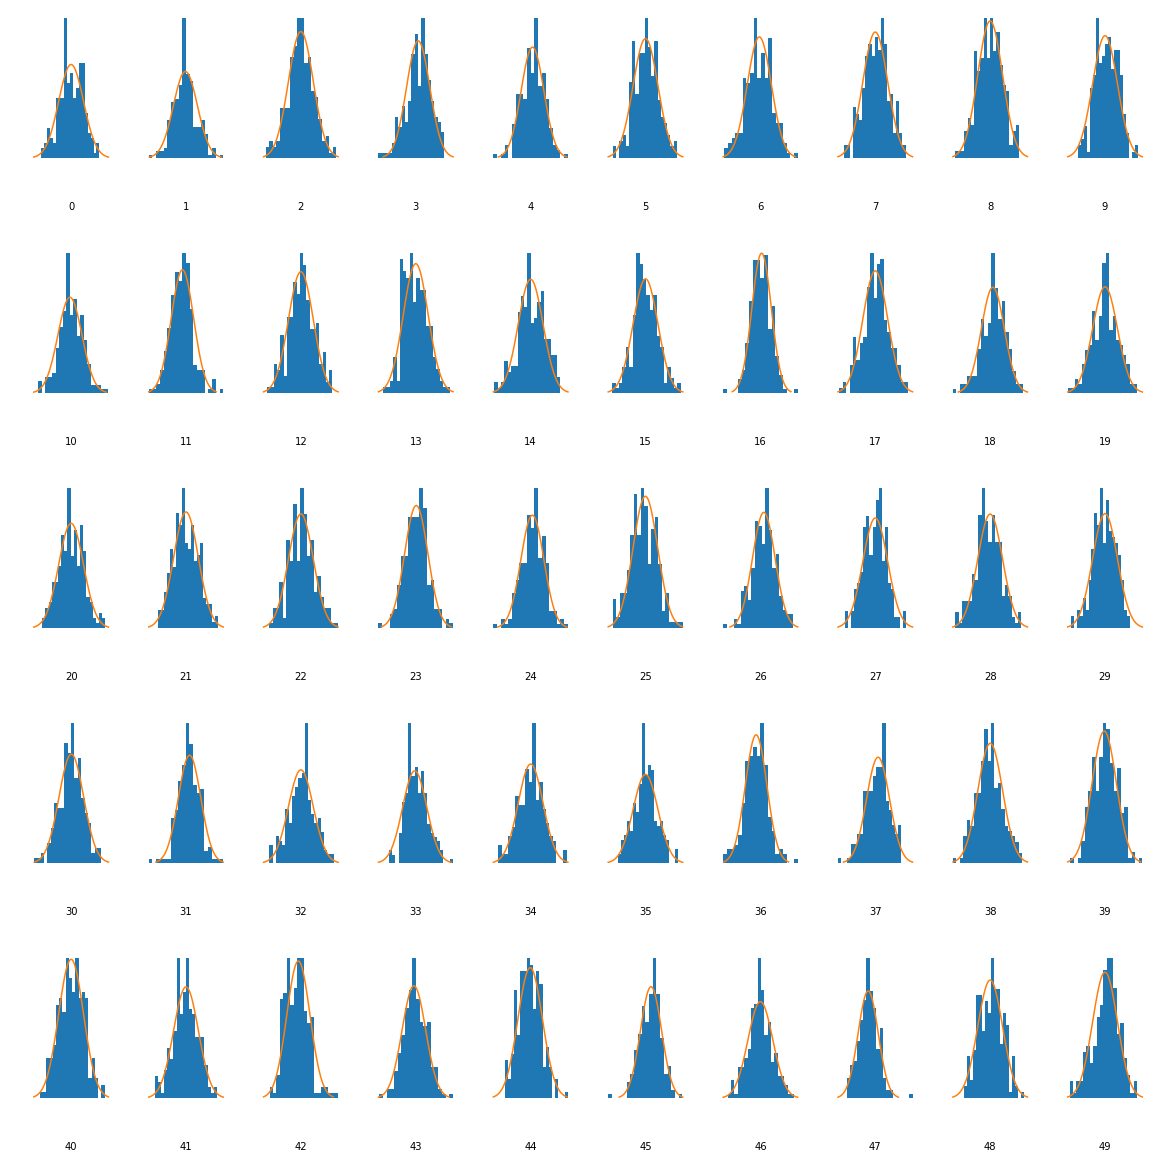

In [13]:
from scipy.stats import norm
x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(50):
    ax = fig.add_subplot(5, 10, i+1)
    ax.hist(z_test[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.text(0.5, -0.35, str(i), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))

plt.show()

In [14]:
NEWLY_PATH = "/home/ubuntu/data/foster/ch03_06/newly_generated_images/"

In [15]:
newly_paths = glob.glob(os.path.join(NEWLY_PATH, "*.jpg"))

In [16]:
newly_images = []
for path in newly_paths:
    img = Image.open(path)
    newly_images.append(img)


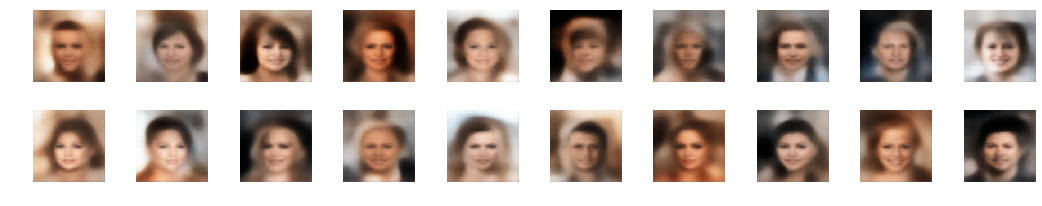

In [17]:
fig = plt.figure(figsize=(18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(newly_images)):
    ax = fig.add_subplot(3, 10, i+1)
    ax.imshow(newly_images[i])
    ax.axis('off')

plt.show()

In [40]:
CHANGED_DIR_PATH = "/home/ubuntu/data/foster/ch03_06/changeds/"
ORIGINAL_DIR_PATH = "/home/ubuntu/data/foster/ch03_06/originals/"

In [46]:
changed_paths = glob.glob("{}/*.jpg".format(CHANGED_DIR_PATH))
original_paths = glob.glob("{}/*.jpg".format(ORIGINAL_DIR_PATH))

changed_paths.sort()
original_paths.sort()

print(len(changed_paths))
print(len(original_paths))

45
5


In [47]:
changed_images = [Image.open(path) for path in changed_paths]
original_images = [Image.open(path) for path in original_paths]

In [ ]:
counter = 1
fig = plt.figure(figsize=(36, 20))
n_to_show = len(original_images)

s = 0
for i in range(n_to_show):
    sub = fig.add_subplot(n_to_show, 10, counter)
    sub.axis('off')        
    sub.imshow(original_images[i])
    counter += 1
    
    for j in range(9):
        index = (counter - 1) % 10 - 1
        ax = fig.add_subplot(n_to_show, 10, counter)
        ax.axis('off')
        ax.imshow(changed_images[s* 9 + index])
        counter += 1
    s += 1

plt.show()
    

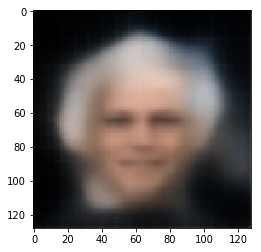

In [31]:
plt.imshow(changed_images[0])
plt.show()